In [113]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
import glob
import os

from hw3_defs import normalize_images, grayscale_images, find_features, get_matches
from fundamental_matrix import getFundamentalMat, F_from_ransac, drawlines, RansacModel

In [101]:
# Save images in a list
imgs = []
dir_name = 'buddha_images/'
list_of_files = sorted( filter( os.path.isfile, glob.glob(dir_name + '*')))
for file_path in list_of_files: imgs.append(cv2.cvtColor(cv2.imread(file_path),cv2.COLOR_BGR2RGB))

imgs_norm = normalize_images(imgs)
imgs_gray = grayscale_images(imgs_norm)
img_h, img_w = imgs_gray[0].shape

In [102]:
# Same Hyperparameter settings as HW3
sift = cv2.SIFT_create(nfeatures=5000, nOctaveLayers=16, contrastThreshold=0.025, edgeThreshold=10, sigma=1.4)

kp, des, imgs_sift = find_features(sift, imgs_gray)

In [103]:
# camera matrix
K = np.array([[1, 0, img_w/2],
             [0, 1, img_h/2],
             [0, 0, 1]])

In [99]:
ptsList = []
goodMatchList = []
for i in range(len(imgs_gray)-1):
    (pts1, pts2), good = get_matches(kp[i],des[i],kp[i+1],des[i+1])
    ptsList.append((pts1, pts2))
    goodMatchList.append(good)


Flist = []
inlier_pts = []
for i in range(len(imgs_gray)-1):
    F, mask, (pts1,pts2) = getFundamentalMat(ptsList[i][0],ptsList[i][1])
    Flist.append(F)
    inlier_pts.append((pts1,pts2))

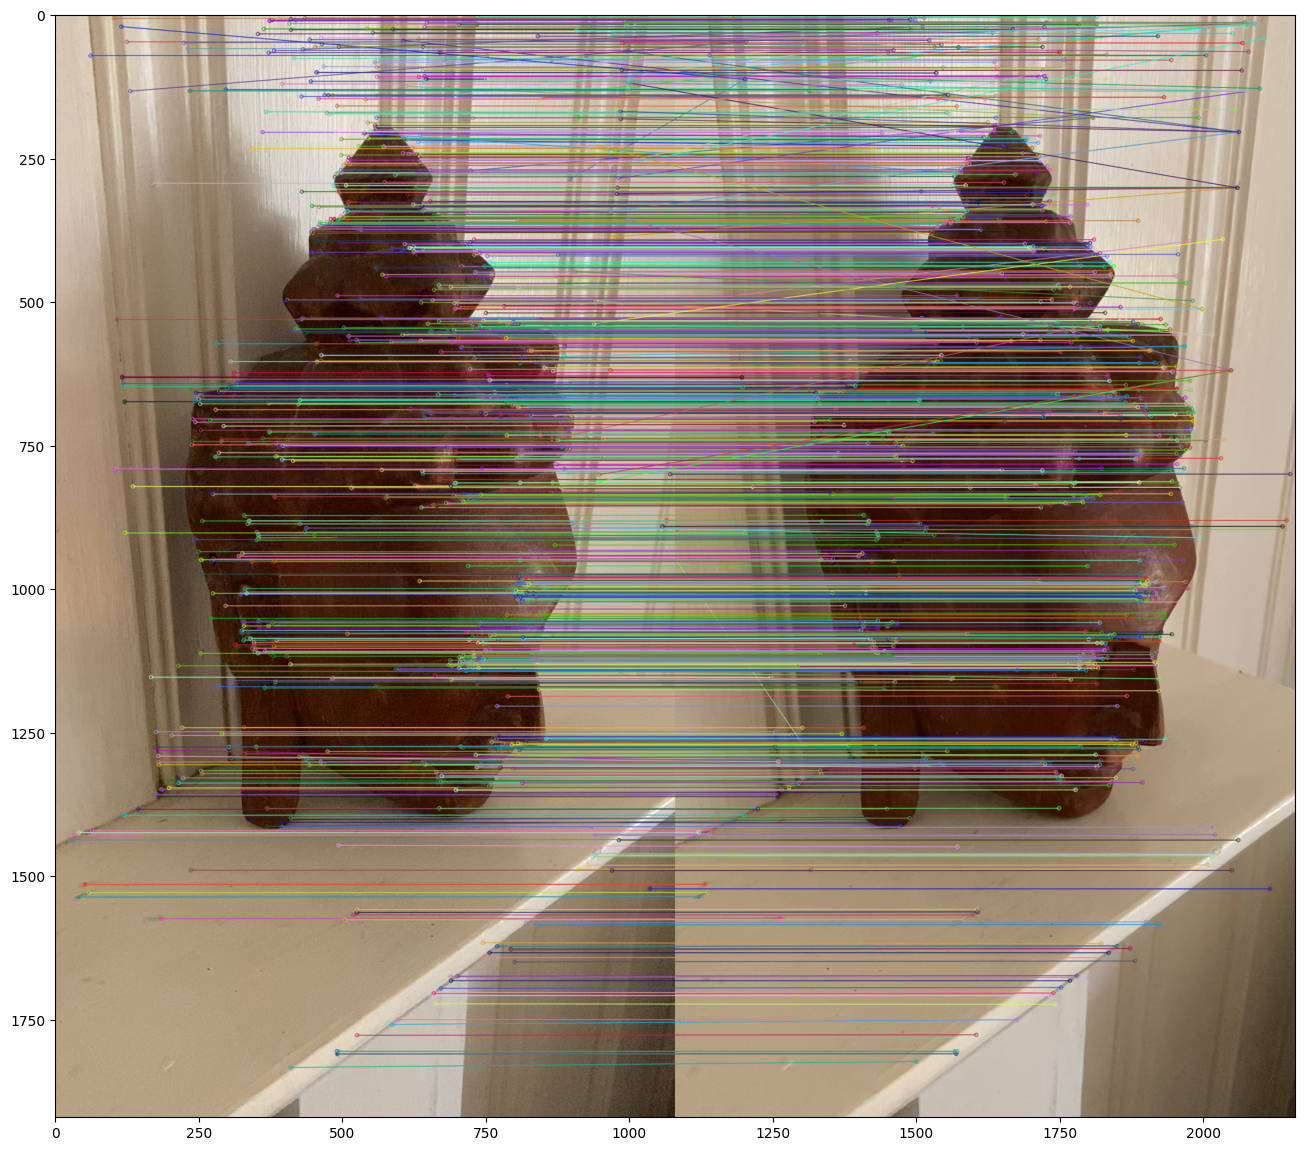

(<matplotlib.image.AxesImage at 0x7f3743c49ac0>, None)

In [97]:
img3 = cv2.drawMatches(imgs_norm[0],kp[0],imgs_norm[1],kp[1],goodMatchList[0],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize = (16,16))
plt.imshow(img3),plt.show()

In [ ]:
epipolar_imgs = []
for i in range(len(imgs_gray)-1):
    # draw epipolar lines
    lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,Flist[i])
    lines1 = lines1.reshape(-1,3)
    img_left, _ = drawlines(imgs_gray[i],imgs_gray[i+1],lines1,pts1,pts2)

    lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,Flist[i])
    lines2 = lines2.reshape(-1,3)
    img_right, _ = drawlines(imgs_gray[i+1],imgs_gray[i],lines2,pts2,pts1)

    epipolar_imgs.append((img_left,img_right))

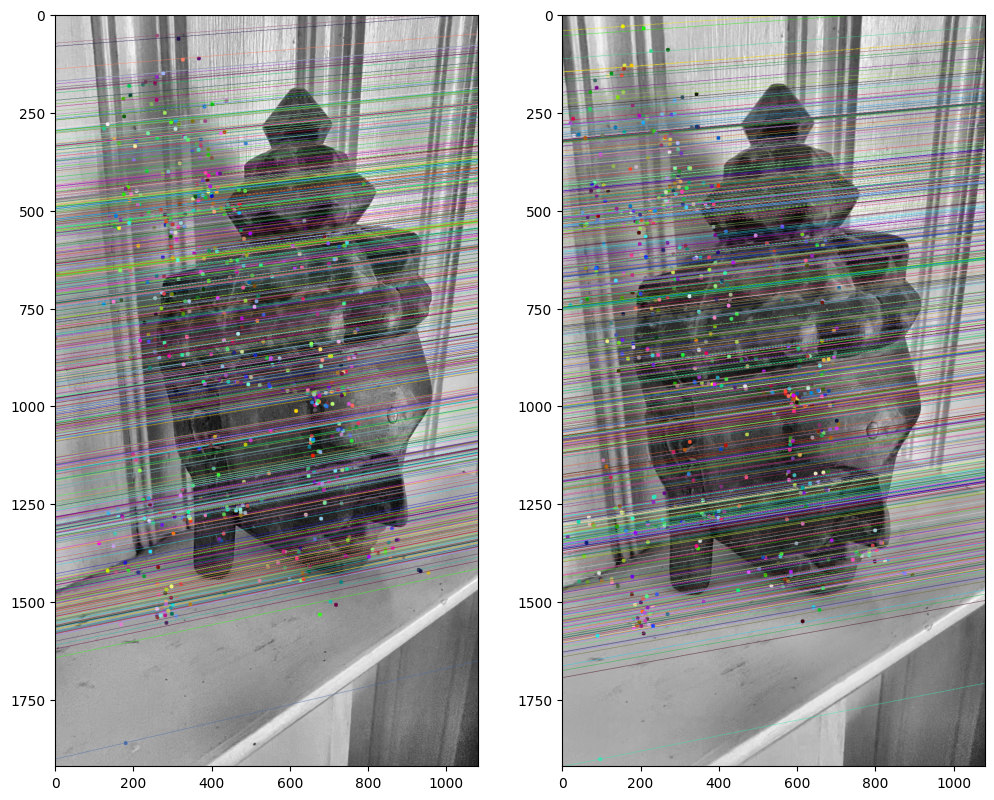

In [ ]:
plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(epipolar_imgs[1][0])
plt.subplot(122),plt.imshow(epipolar_imgs[1][1])
plt.show()

In [107]:
i = 5
(pts1, pts2), good = get_matches(kp[i],des[i],kp[i+1],des[i+1])

print(pts1.shape)

pts11 = np.array([pts1[:, 0],
                pts1[:,1],
                np.ones(pts1.shape[0])])

pts21 = np.array([pts2[:, 0],
                pts2[:,1],
                np.ones(pts2.shape[0])])

model = RansacModel()
F1, mask1 = F_from_ransac(pts11, pts21, model)

(657, 2)


NameError: name 'ransac' is not defined

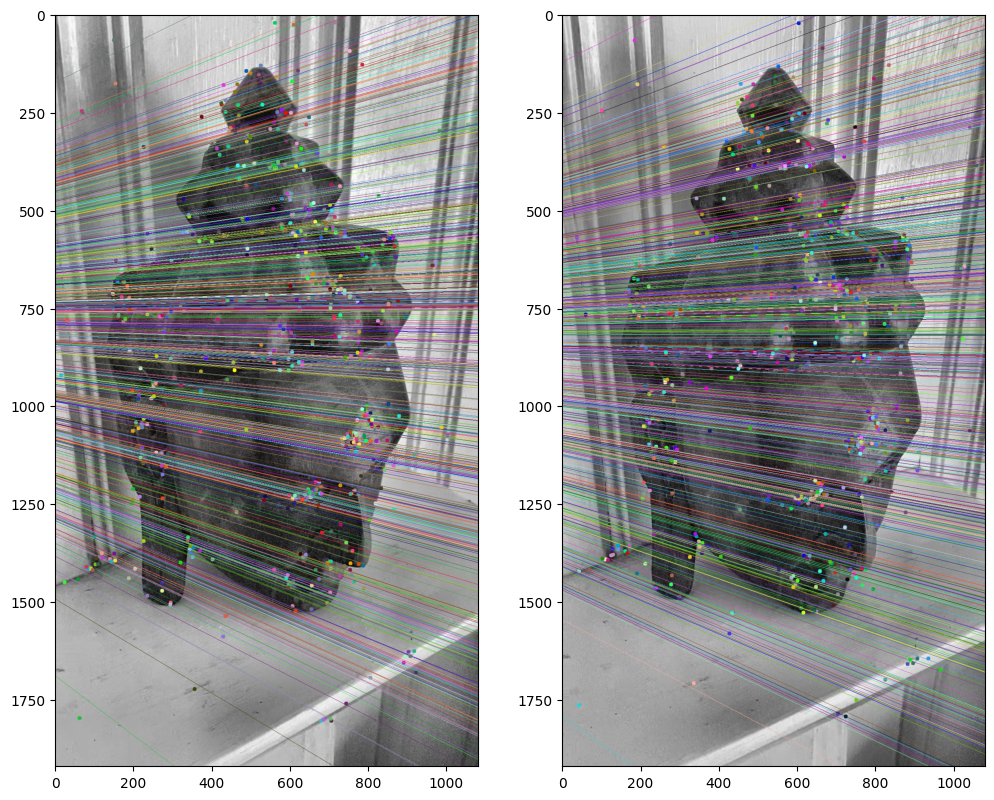

In [82]:
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F1)
lines1 = lines1.reshape(-1,3)
img_left, _ = drawlines(imgs_gray[i],imgs_gray[i+1],lines1,pts1,pts2)

lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F1)
lines2 = lines2.reshape(-1,3)
img_right, _ = drawlines(imgs_gray[i+1],imgs_gray[i],lines2,pts2,pts1)

plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(img_left)
plt.subplot(122),plt.imshow(img_right)
plt.show()

In [114]:
i = 5
(pts1, pts2), good = get_matches(kp[i],des[i],kp[i+1],des[i+1])

F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS,cv2.RANSAC,1.0)

pts11 = np.array([pts1[:, 0],
                pts1[:,1],
                np.ones(pts1.shape[0])])

pts21 = np.array([pts2[:, 0],
                pts2[:,1],
                np.ones(pts2.shape[0])])


model = RansacModel()
F1, mask1 = F_from_ransac(pts11, pts21, model)


NameError: name 'ransac' is not defined

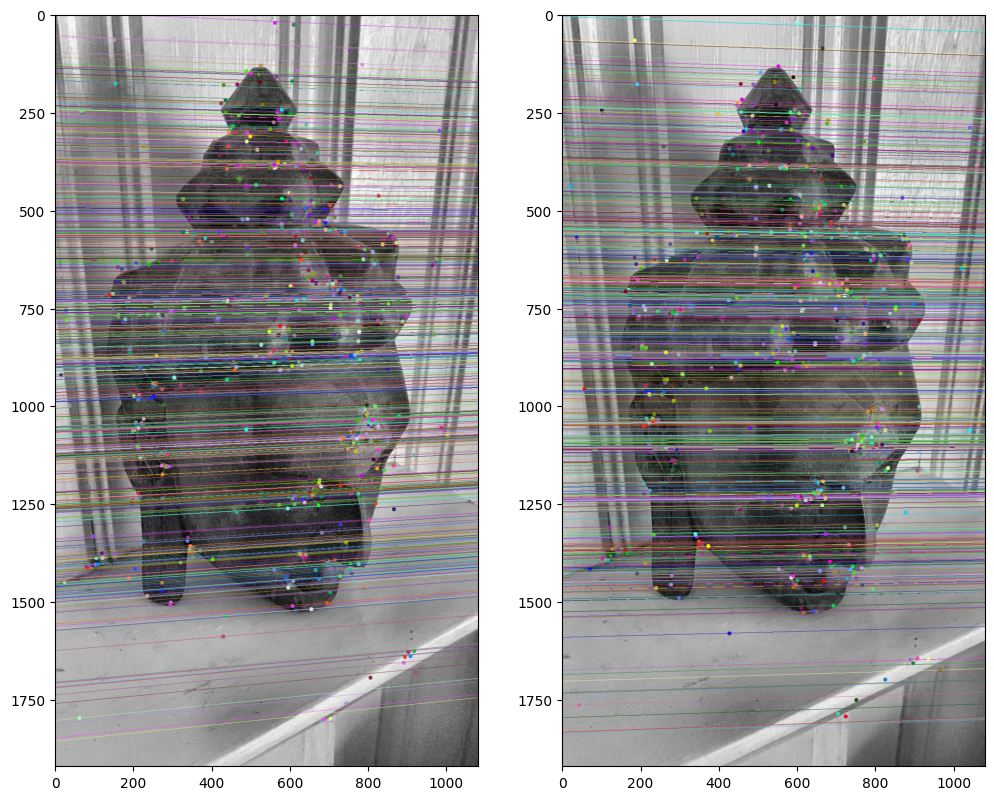

In [85]:
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img_left, _ = drawlines(imgs_gray[i],imgs_gray[i+1],lines1,pts1,pts2)

lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img_right, _ = drawlines(imgs_gray[i+1],imgs_gray[i],lines2,pts2,pts1)

plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(img_left)
plt.subplot(122),plt.imshow(img_right)
plt.show()

0 95
0 68
0 1299
0 1293
0 570
0 578
0 689
0 1709
0 1063
0 277
0 1241
0 1237
0 1704
0 1711
0 1718
0 628
0 164
0 636
0 1719
0 660
0 1169
0 1454
0 579
0 1822
0 1052
0 580
0 589
0 820
0 820
0 798
0 1320
0 1322
0 1118
0 573
0 1177
0 1115
0 822
0 1186
0 822
0 587
0 1084
0 644
0 1289
0 1865
0 1104
0 888
0 882
0 1113
0 1453
0 1101
0 600
0 746
0 387
0 1447
0 601
0 1255
0 1255
0 731
0 848
0 1518
0 730
0 742
0 1136
0 1121
0 598
0 618
0 1092
0 1107
0 1423
0 731
0 1099
0 1085
0 1085
0 1086
0 1443
0 718
0 710
0 893
0 1391
0 1461
0 1241
0 726
0 727
0 1412
0 826
0 826
0 1418
0 816
0 1101
0 1387
0 1419
0 1391
0 1359
0 711
0 1442
0 1118
0 568
0 837
0 1410
0 1410
0 1394
0 1109
0 51
0 832
0 787
0 778
0 789
0 1109
0 674
0 716
0 679
0 1335
0 716
0 1409
0 714
0 712
0 1446
0 691
0 1396
0 1507
0 1408
0 725
0 558
0 1090
0 1429
0 439
0 751
0 1507
0 695
0 725
0 689
0 554
0 1450
0 1450
0 711
0 1515
0 564
0 563
0 1393
0 1438
0 681
0 1429
0 1525
0 696
0 695
0 1252
0 731
0 555
0 555
0 1233
0 1408
0 1467
0 1400
0 532


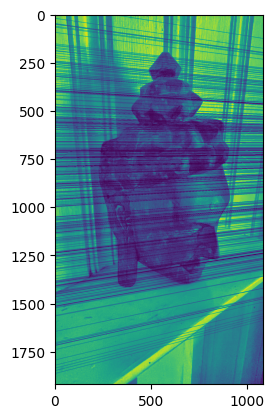

In [51]:
imgs_gray = grayscale_images(imgs_norm)

lines_CAM1 = cv2.computeCorrespondEpilines(pts1, 2, F)
lines_CAM1 = lines_CAM1.reshape(-1, 3)
width_CAM1 = imgs_gray[0].shape[1]
img_0 = imgs_gray[0]
for lines in lines_CAM1:
    x0, y0 = map(int, [0, -lines[2] / lines[1]])
    print(x0, y0)
    x1, y1 = map(int, [width_CAM1, -(lines[2] + lines[0] * width_CAM1) / lines[1]])
    img_0 = cv2.line(img_0, (x0, y0), (x1, y1), (0, 255, 0), 1)

plt.imshow(img_0)

0 -545
0 -601
0 2595
0 2569
0 686
0 702
0 970
0 3484
0 1868
0 -12
0 2225
0 2215
0 3276
0 3232
0 3239
0 780
0 94
0 794
0 3196
0 846
0 1928
0 1473
0 657
0 3278
0 1636
0 656
0 673
0 1134
0 1134
0 1085
0 2138
0 2133
0 1718
0 633
0 1830
0 1705
0 1122
0 1841
0 1121
0 659
0 1635
0 769
0 2029
0 3178
0 1651
0 1231
0 1219
0 1663
0 2324
0 1635
0 675
0 951
0 276
0 2292
0 676
0 1914
0 1914
0 917
0 1137
0 2410
0 915
0 937
0 1678
0 1644
0 667
0 703
0 1589
0 1618
0 2214
0 912
0 1599
0 1571
0 1570
0 1571
0 2242
0 885
0 870
0 1208
0 2139
0 2266
0 1851
0 898
0 898
0 2166
0 1079
0 1079
0 1472
0 1060
0 1583
0 2112
0 1475
0 2113
0 1410
0 863
0 2199
0 1603
0 604
0 1090
0 1470
0 1470
0 1453
0 1581
0 -312
0 1079
0 998
0 979
0 999
0 1577
0 793
0 868
0 801
0 1984
0 867
0 1474
0 863
0 856
0 2172
0 818
0 1463
0 2275
0 1479
0 876
0 583
0 1119
0 2126
0 374
0 920
0 2263
0 820
0 873
0 810
0 575
0 2149
0 2149
0 846
0 2263
0 592
0 589
0 1466
0 2115
0 791
0 2097
0 2260
0 815
0 812
0 1774
0 873
0 573
0 572
0 1736
0 1486
0

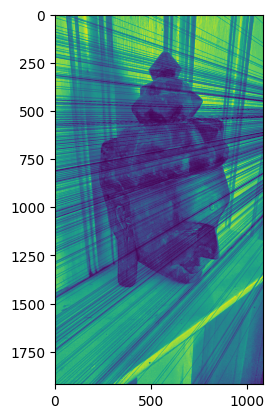

In [52]:
imgs_gray = grayscale_images(imgs_norm)

lines_CAM1 = cv2.computeCorrespondEpilines(pts1, 2, F1)
lines_CAM1 = lines_CAM1.reshape(-1, 3)
width_CAM1 = imgs_gray[0].shape[1]
img_0 = imgs_gray[0]
for lines in lines_CAM1:
    x0, y0 = map(int, [0, -lines[2] / lines[1]])
    print(x0, y0)
    x1, y1 = map(int, [width_CAM1, -(lines[2] + lines[0] * width_CAM1) / lines[1]])
    img_0 = cv2.line(img_0, (x0, y0), (x1, y1), (0, 255, 0), 1)

plt.imshow(img_0)
